In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv("dataset.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
## spliting the data into independent and dependent variable

In [23]:
X = df.drop("math_score",axis=1)
y = df['math_score']
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [24]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train.shape,y_train.shape

((800, 7), (800,))

In [50]:
## applying feature engineering

In [51]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [52]:
numerical_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(exclude='number').columns.tolist()



num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("oneHot_Encoder",OneHotEncoder(handle_unknown="ignore"))
    ]
)


prepropessor = ColumnTransformer(
    [
        ("num",num_pipeline,numerical_cols),
        ("cat",cat_pipeline,categorical_cols)
    ]
)

In [53]:
prepropessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['reading_score', 'writing_score']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHot_Encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'race_ethnicity',
                                  'parental_level_of_education', 'lunch',
                                  'test_preparation_course'])])

In [58]:
X_train_transformer=prepropessor.fit_transform(X_train)

In [56]:
X_test_transformer=prepropessor.transform(X_test)

In [59]:
X_train_transformer

array([[ 0.03079054,  0.43405338,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.9302895 ,  0.96470125,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.34544287,  1.1636942 ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.52274728, -1.02522827,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.49143847, -1.02522827,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.48382733,  1.36268716,  1.        , ...,  1.        ,
         0.        ,  1.        ]])

In [60]:
X_test_transformer

array([[ 1.13786619,  1.03103224,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.24597837,  0.30139141,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.23836723,  0.23506043,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.79190505,  0.50038436,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.51513614,  0.36772239,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.30755945,  0.23506043,  1.        , ...,  1.        ,
         1.        ,  0.        ]])

In [69]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [62]:
## initiate the model

In [63]:
models = {
    "LinerRegressor":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomforestRegressor":RandomForestRegressor(),
    "Adaboosting":AdaBoostRegressor(),
    "GradientDecentRegressor":GradientBoostingRegressor(),
    "supportvectorRegressor":SVR(),
    "XgboostingRegressor":XGBRegressor(),
    "CatboostingRegressor":CatBoostRegressor()
}

In [86]:
model_list = []
X_train_score = []
X_test_score = []


for model_name, model in models.items():
    model.fit(X_train_transformer,y_train)

    ## prediction with training and testing
    y_train_pred = model.predict(X_train_transformer)
    y_test_pred = model.predict(X_test_transformer)

    ## evaluate the model with training and testing data
    x_train_mse = mean_squared_error(y_train,y_train_pred)
    x_train_mae = mean_absolute_error(y_train,y_train_pred)
    x_train_r2 = r2_score(y_train,y_train_pred)
    x_train_rmse = np.sqrt(x_train_mse)

    x_test_mse = mean_squared_error(y_test,y_test_pred)
    x_test_mae = mean_absolute_error(y_test,y_test_pred)
    x_test_r2 = r2_score(y_test,y_test_pred)
    x_test_rmse = np.sqrt(x_test_mse)

    ## print
    print(f"Model:{model_name}")
    print("Training set")
    print(f" MSE: {x_train_mse:.3f}, MAE: {x_train_mae:.3f}, R2 Score: {x_train_r2:.3f} , RMSE: {x_train_rmse:.3f} ")
    print("Testing set")
    print(f" MSE: {x_test_mse:3f}, MAE :{x_test_mae:.3f}, R2 Score : {x_test_r2:.3f} , RMSE: {x_test_rmse:.3f} ")
    print("-----------------------------")

Model:LinerRegressor
Training set
 MSE: 28.335, MAE: 4.267, R2 Score: 0.874 , RMSE: 5.323 
Testing set
 MSE: 29.095170, MAE :4.215, R2 Score : 0.880 , RMSE: 5.394 
-----------------------------
Model:Ridge
Training set
 MSE: 28.338, MAE: 4.265, R2 Score: 0.874 , RMSE: 5.323 
Testing set
 MSE: 29.056602, MAE :4.211, R2 Score : 0.881 , RMSE: 5.390 
-----------------------------
Model:Lasso
Training set
 MSE: 43.461, MAE: 5.205, R2 Score: 0.807 , RMSE: 6.593 
Testing set
 MSE: 42.475567, MAE :5.156, R2 Score : 0.825 , RMSE: 6.517 
-----------------------------
Model:DecisionTreeRegressor
Training set
 MSE: 0.078, MAE: 0.019, R2 Score: 1.000 , RMSE: 0.280 
Testing set
 MSE: 64.790000, MAE :6.300, R2 Score : 0.734 , RMSE: 8.049 
-----------------------------
Model:RandomforestRegressor
Training set
 MSE: 5.120, MAE: 1.814, R2 Score: 0.977 , RMSE: 2.263 
Testing set
 MSE: 36.730504, MAE :4.725, R2 Score : 0.849 , RMSE: 6.061 
-----------------------------
Model:Adaboosting
Training set
 MSE:

In [89]:
from sklearn.linear_model import LinearRegression

In [97]:
lin_model = LinearRegression()
model_linear=lin_model.fit(X_train_transformer,y_train)
pred = model_linear.predict(X_test_transformer)
score = r2_score(pred,y_test)

In [98]:
print(f"model score:{score}")

model score:0.8670435914705469


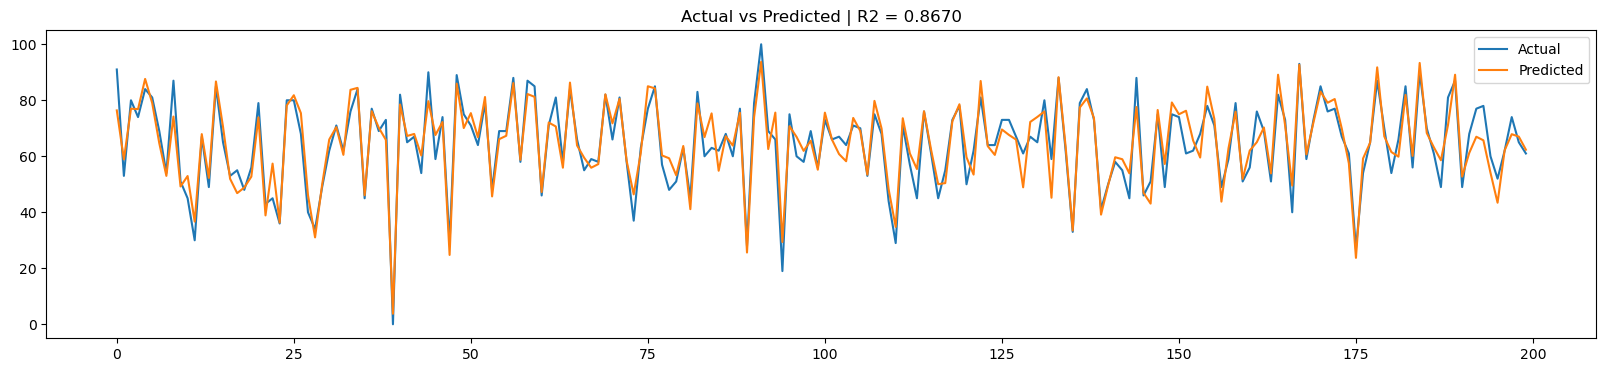

In [110]:
# Line plot
plt.figure(figsize=(20,4))
plt.plot(y_test.values, label="Actual")
plt.plot(pred, label="Predicted")
plt.title(f"Actual vs Predicted | R2 = {score:.4f}")
plt.legend()
plt.show()


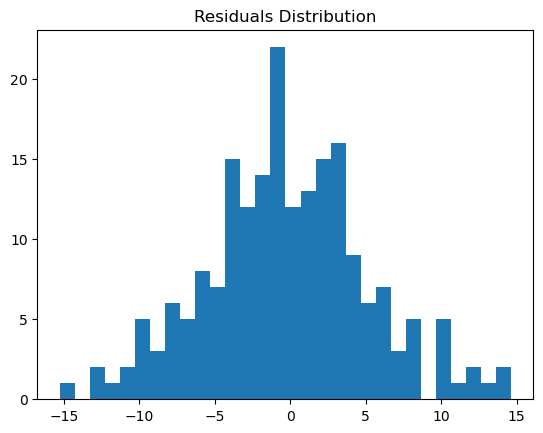

In [103]:
# Residuals hist
plt.figure()
plt.hist(y_test - pred, bins=30)
plt.title("Residuals Distribution")
plt.show()

<Axes: xlabel='math_score', ylabel='Count'>

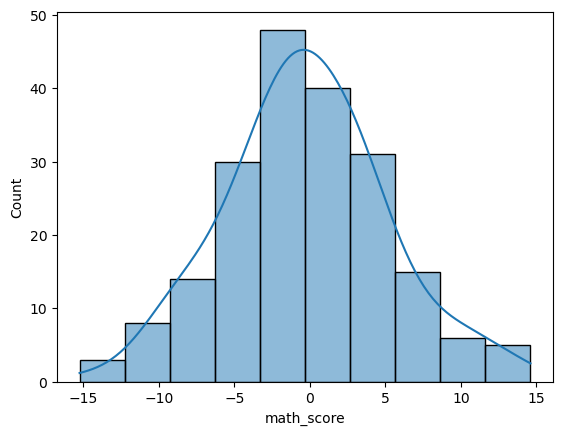

In [108]:
import seaborn as sns
sns.histplot(y_test - pred, bins=10, kde=True)



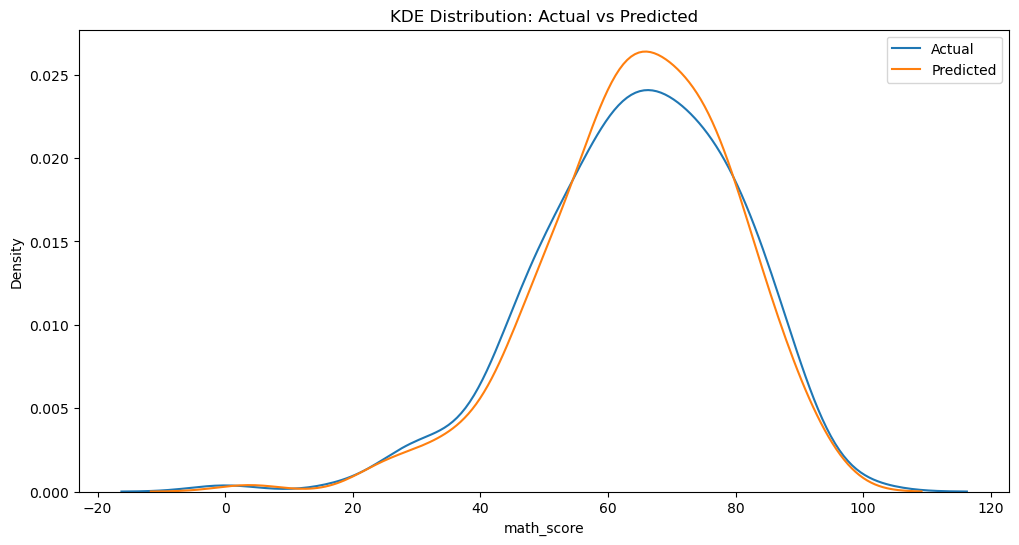

In [112]:
plt.figure(figsize=(12,6))
sns.kdeplot(y_test, label="Actual")
sns.kdeplot(pred, label="Predicted")
plt.title("KDE Distribution: Actual vs Predicted")
plt.legend()
plt.show()